In [ ]:
# Libraries
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 
import datetime

In [ ]:
# Keys
Comida
hola

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
data = api.me()

In [ ]:
# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

# function to get extended retweets
def jsonify_tweepy_2(tweet_info):

    if "retweeted_status" in dir(tweet_info):
      return tweet_info.retweeted_status.full_text
    else:
      return tweet_info.full_text

# df.iloc[row][col]

Accounts or keywords
Keywords
* "car innovation ideas"
* ""
* "mustang mach e"
* "ford vehicle issues"
* "ford car issues"
* "truck issues"

Pages

In [ ]:
startDate = datetime.datetime(2021, 7, 4, 0, 0, 0)
endDate =   datetime.datetime(2022, 7, 4, 0, 0, 0)

In [ ]:
# searching by keywords
keyword_res = list(tweepy.Cursor(api.search, q="mustang mach e", tweet_mode="extended").items(3000))

In [ ]:
#truck_issues = json_normalize([jsonify_tweepy(tweet) for tweet in truck_issues_req])
keyword_df = json_normalize([jsonify_tweepy(tweet) for tweet in keyword_res])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
keyword_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in keyword_res ])

In [ ]:
keyword_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.user.entities.url.urls
0,Mon Apr 11 00:30:35 +0000 2022,1513313526324113420,1513313526324113420,@Jaswht Tesla? Mustang mach e?,False,"[8, 30]","<a href=""http://twitter.com/download/android"" ...",1.513313e+18,1513313243430678530,344434288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 11 00:09:32 +0000 2022,1513308228691578885,1513308228691578885,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 100]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Apr 10 23:33:35 +0000 2022,1513299182869745670,1513299182869745670,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 100]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Apr 10 23:32:22 +0000 2022,1513298874550657027,1513298874550657027,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 55]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Apr 10 20:03:15 +0000 2022,1513246248517570561,1513246248517570561,https://t.co/F80hQJ46M8,False,"[0, 23]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#print(keyword_df.columns[150:200])

In [ ]:
len(keyword_df)

338

In [ ]:
keyword_df.to_excel("mustang_mach_e041022.xlsx")

## Executing sentiment analisis

In [ ]:
!pip install langdetect 

     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9f5383df708eca594a8e868f0db925d5ccc6352ee0a00144a9fafd1abcd495ea
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import numpy as np
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# New dataframe columns
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [ ]:
keyword_df = pd.read_excel("mustang_mach_e041022.xlsx")
tweets = keyword_df.full_text

In [ ]:
noOfTweet = len(keyword_df)

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  338
positive number:  151
negative number:  52
neutral number:  135


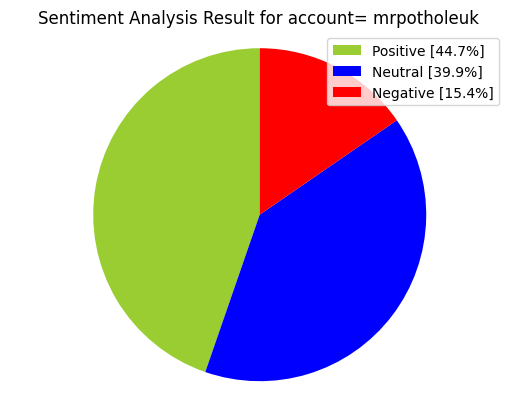

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for account= mrpotholeuk" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@Jaswht Tesla? Mustang mach e?,@Jaswht Tesla? Mustang mach e?
1,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...
4,https://t.co/F80hQJ46M8,https://t.co/F80hQJ46M8
5,@naimsharif0 Mustang Mach E,@naimsharif0 Mustang Mach E
6,@CarlKoinberg @sdmoores @benchmarkmin Yes. Mus...,@CarlKoinberg @sdmoores @benchmarkmin Yes. Mus...
...,...,...
325,101 year old area man Iived to see it.\n\nhttp...,101 year old area man Iived to see it.\n\nhttp...
326,Here's What The 2022 Ford Mustang Mach E GT Ge...,Here's What The 2022 Ford Mustang Mach E GT Ge...
328,すごい。可愛い！\nMUSTANG MACH-Eの入手方法が微塵もわかりませんけど、手に入っ...,すごい。可愛い！\nMUSTANG MACH-Eの入手方法が微塵もわかりませんけど、手に入っ...
335,Ford's Mustang Mach-E beats Tesla's Model 3 as...,Ford's Mustang Mach-E beats Tesla's Model 3 as...


In [ ]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@Jaswht Tesla? Mustang mach e?,tesla mustang mach e
1,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,ford mustang mach e 1400 forzahorizon5
4,https://t.co/F80hQJ46M8,
5,@naimsharif0 Mustang Mach E,mustang mach e
6,@CarlKoinberg @sdmoores @benchmarkmin Yes. Mus...,yes mustang mach e battery size is 98kw...
7,@gmbutts What's your top pick right now? I hea...,what s your top pick right now i hear the i...
8,This 2022 Mustang Mach e is at the plant and i...,this 2022 mustang mach e is at the plant and i...
9,2022 Mustang Mach-E and Ford Promise Plan\n\nE...,2022 mustang mach e and ford promise plan ev ...
11,Ford Mustang Mach-E Buyers Overwhelmingly Opti...,ford mustang mach e buyers overwhelmingly opti...
12,@Kia since y’all didn’t want to reply to my FB...,since y all didn t want to reply to my fb me...


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Jaswht Tesla? Mustang mach e?,tesla mustang mach e,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,ford mustang mach e 1400 forzahorizon5,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,https://t.co/F80hQJ46M8,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
5,@naimsharif0 Mustang Mach E,mustang mach e,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,@CarlKoinberg @sdmoores @benchmarkmin Yes. Mus...,yes mustang mach e battery size is 98kw...,-0.500000,1.000000,positive,0.000,0.803,0.197,0.4019
7,@gmbutts What's your top pick right now? I hea...,what s your top pick right now i hear the i...,0.392857,0.517857,positive,0.000,0.904,0.096,0.2023
8,This 2022 Mustang Mach e is at the plant and i...,this 2022 mustang mach e is at the plant and i...,0.400000,0.500000,positive,0.000,0.803,0.197,0.6858
9,2022 Mustang Mach-E and Ford Promise Plan\n\nE...,2022 mustang mach e and ford promise plan ev ...,0.366667,0.700000,positive,0.054,0.787,0.160,0.5719
11,Ford Mustang Mach-E Buyers Overwhelmingly Opti...,ford mustang mach e buyers overwhelmingly opti...,0.500000,1.000000,negative,0.176,0.824,0.000,-0.1280
12,@Kia since y’all didn’t want to reply to my FB...,since y all didn t want to reply to my fb me...,0.193182,0.352273,positive,0.077,0.802,0.120,0.1280


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,115,45.28
neutral,97,38.19
negative,42,16.54


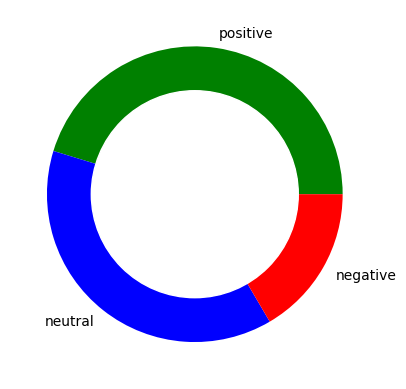

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


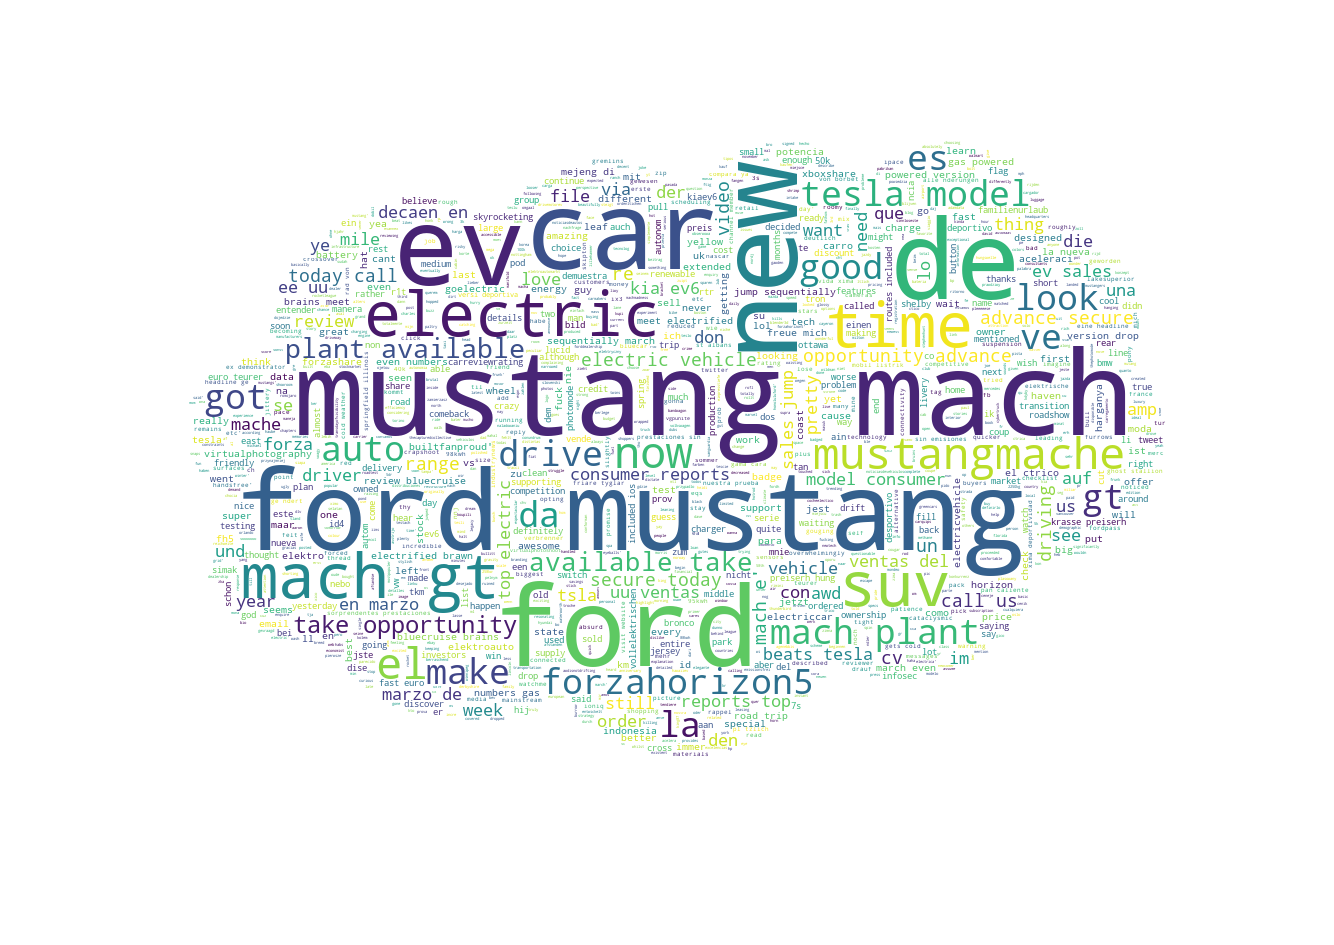

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


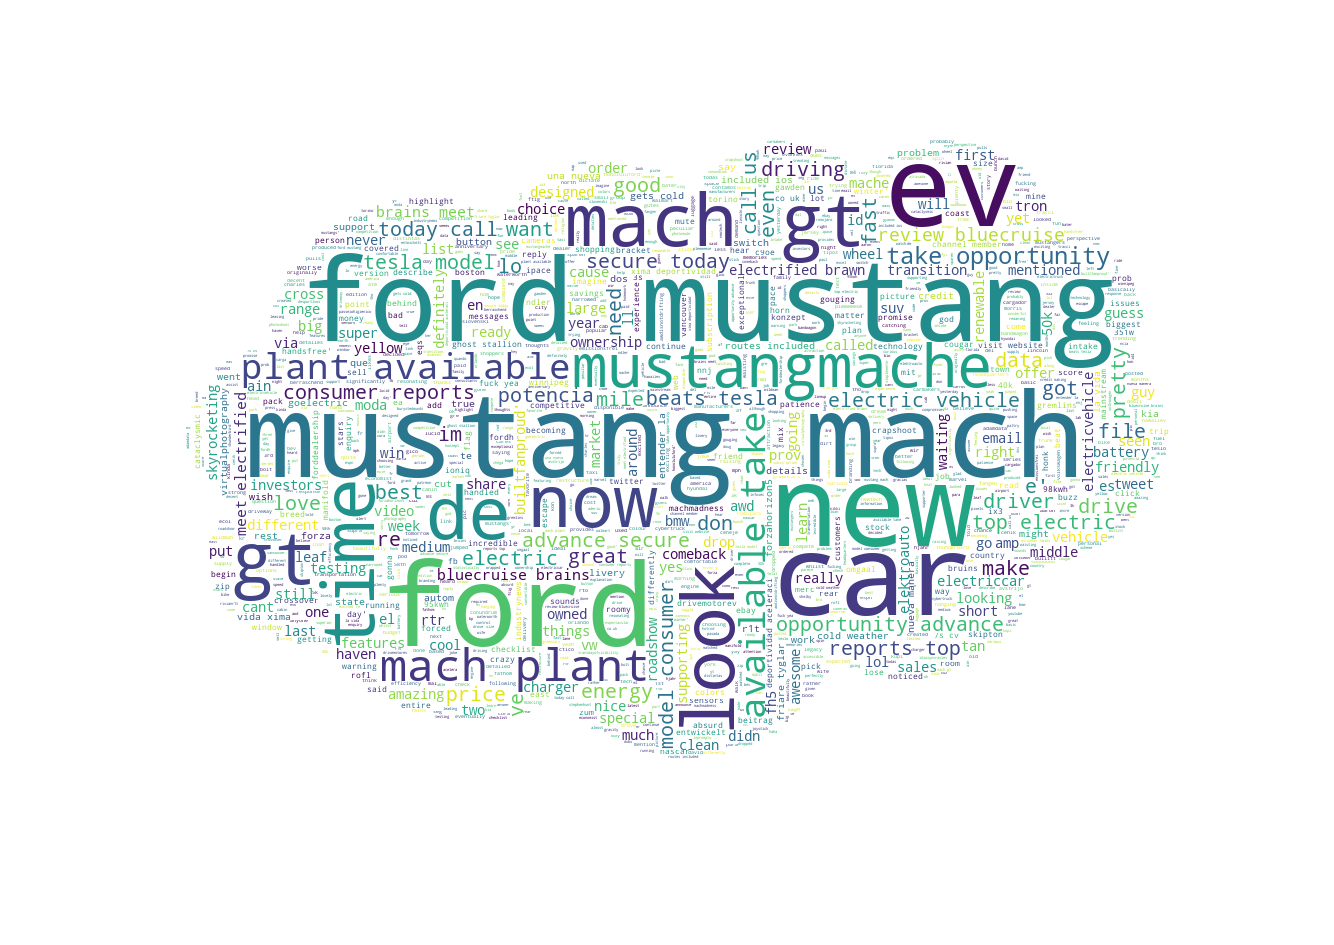

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


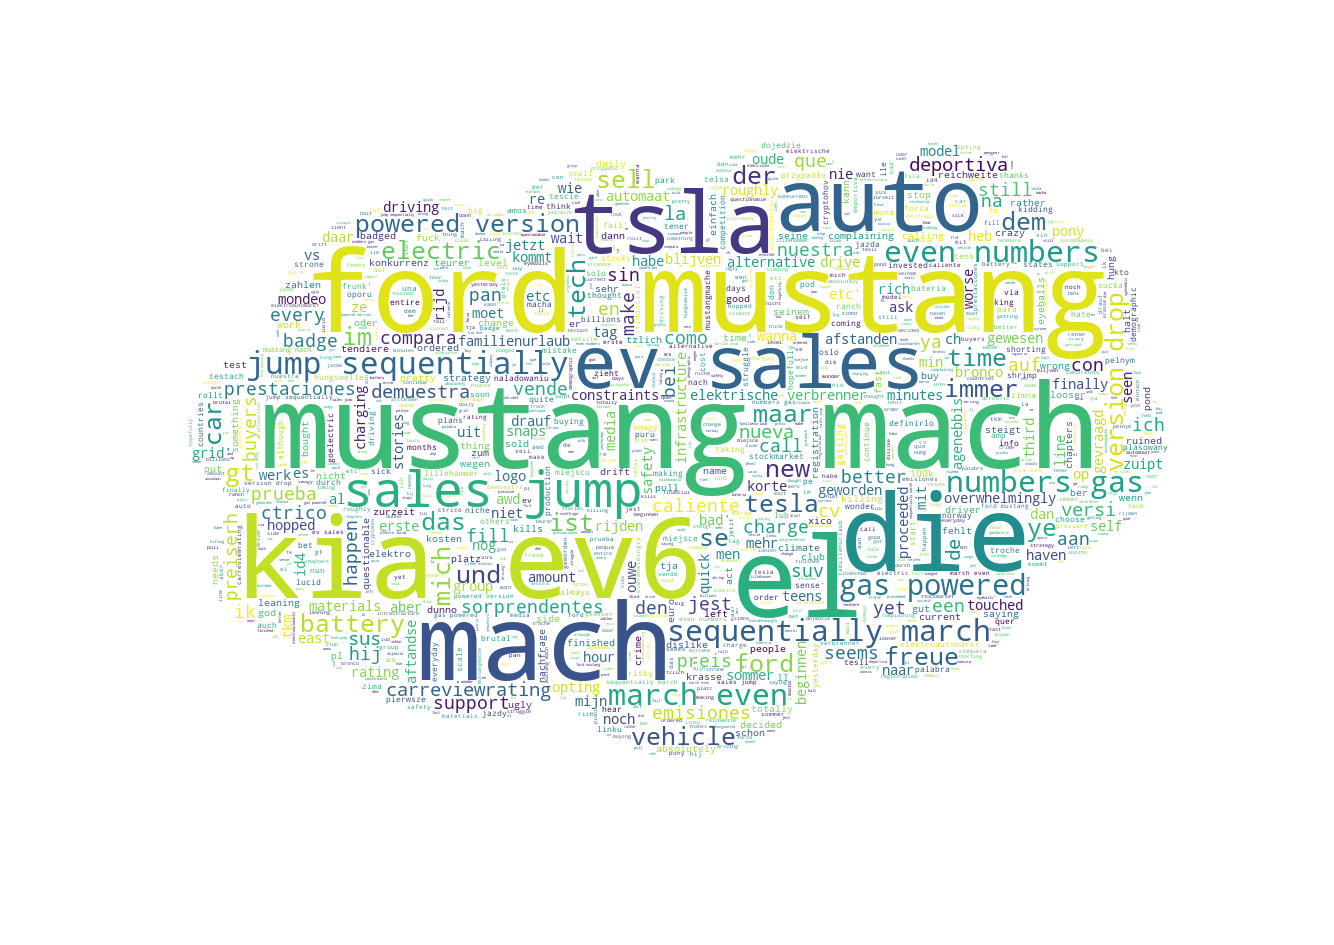

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


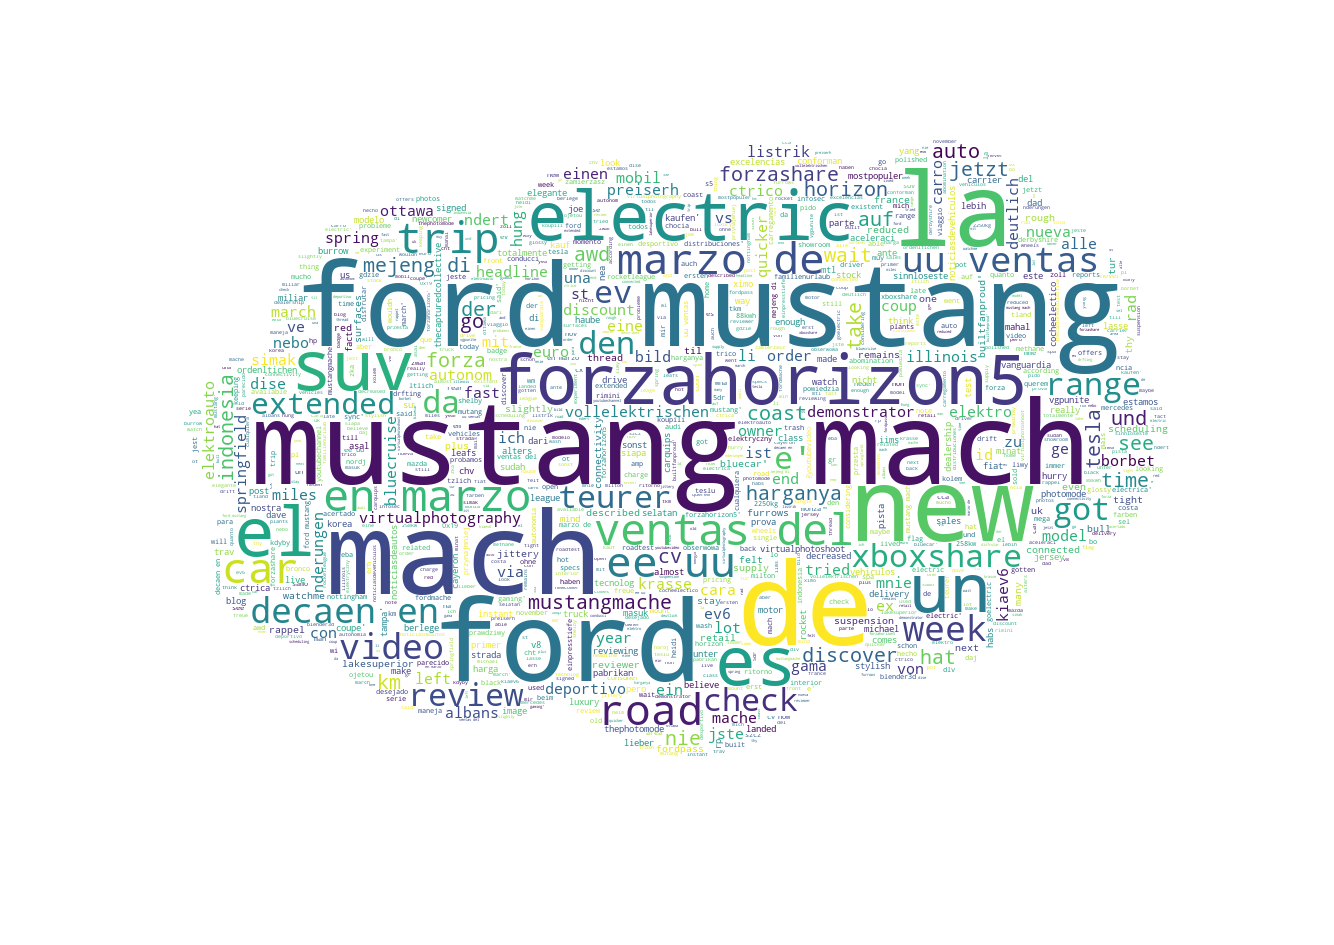

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,133.00
neutral,85.25
positive,137.71


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,25.07
neutral,14.64
positive,25.30


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@Jaswht Tesla? Mustang mach e?,tesla mustang mach e,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,24,4,tesla mustang mach e,"[, tesla, mustang, mach, e, ]","[, tesla, mustang, mach, e, ]","[, tesla, mustang, mach, e, ]"
1,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,ford mustang mach e 1400 forzahorizon5,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,45,6,ford mustang mach e forzahorizon,"[ford, mustang, mach, e, forzahorizon, ]","[ford, mustang, mach, e, forzahorizon, ]","[ford, mustang, mach, e, forzahorizon, ]"
4,https://t.co/F80hQJ46M8,,0.0,0.0,neutral,0.0,0.000,0.000,0.0000,1,0,,"[, ]","[, ]","[, ]"
5,@naimsharif0 Mustang Mach E,mustang mach e,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,16,3,mustang mach e,"[, mustang, mach, e]","[, mustang, mach, e]","[, mustang, mach, e]"
6,@CarlKoinberg @sdmoores @benchmarkmin Yes. Mus...,yes mustang mach e battery size is 98kw...,-0.5,1.0,positive,0.0,0.803,0.197,0.4019,80,14,yes mustang mach e battery size is kwh ...,"[, yes, mustang, mach, e, battery, size, is, k...","[, yes, mustang, mach, e, battery, size, kwh, ...","[, ye, mustang, mach, e, batteri, size, kwh, e..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

254 Number of reviews has 1313 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aan,aaron,aber,abl,abomin,absolut,absurd,access,accord,...,zima,zimna,zip,zka,zoll,zu,zuipt,zum,zurzeit,zwar
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
mustang,245
e,242
mach,233
ford,140
ev,35
de,34
electr,31
new,29
car,27
gt,25


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('mustang mach', 198),
 ('ford mustang', 109),
 ('mach gt', 17),
 ('2022 ford', 12),
 ('2022 mustang', 10),
 ('tesla model', 9),
 ('mach plant', 8),
 ('plant available', 8),
 ('available opportunity', 8),
 ('opportunity advance', 8),
 ('advance secure', 8),
 ('secure today', 8),
 ('today 603', 8),
 ('603 283', 8),
 ('283 5900', 8),
 ('consumer reports', 7),
 ('electric vehicle', 7),
 ('mach mustang', 7),
 ('kia ev6', 7),
 ('ev sales', 6)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('ford mustang mach', 105),
 ('mustang mach gt', 17),
 ('2022 ford mustang', 12),
 ('2022 mustang mach', 10),
 ('mustang mach plant', 8),
 ('mach plant available', 8),
 ('plant available opportunity', 8),
 ('available opportunity advance', 8),
 ('opportunity advance secure', 8),
 ('advance secure today', 8),
 ('secure today 603', 8),
 ('today 603 283', 8),
 ('603 283 5900', 8),
 ('mustang mach beats', 6),
 ('mach beats tesla', 6),
 ('beats tesla model', 6),
 ('consumer reports electric', 6),
 ('ventas del ford', 6),
 ('del ford mustang', 6),
 ('en marzo 2022', 6)]